                                 Rohak Singhal, 3035242475

# Chapter 6, Exercise 8 

In [38]:
set.seed(2475)

In [39]:
options(repr.plot.width=5, repr.plot.height=5)

## (a)

In [40]:
x = rnorm(100)

In [41]:
print(x[1:10])

 [1]  0.17581566 -0.85333388 -0.07059335 -2.10899960 -0.51240497 -1.99360400
 [7]  1.20137416  0.46939682 -1.12695202 -0.04882572


In [42]:
eps = rnorm(100,sd = 0.25)

In [43]:
print(eps[1:10])

 [1]  0.10872978 -0.19021754 -0.46820886 -0.23043247 -0.28465594 -0.02326492
 [7] -0.21971921 -0.28872984  0.05841346  0.60278375


## (b)

In [44]:
b_0 = 12 
b_1 = 5
b_2 = 4.3
b_3 = -8

In [45]:
Y = b_0 + b_1 * (x) + b_2 * (x**2) + b_3 * (x**3) + eps

In [46]:
print(Y[1:10])

 [1] 13.07725 15.64532 11.20307 95.39506 11.35861 82.48683 10.12180 14.17830
 [9] 23.33476 12.36984


## (c)

In [51]:
df = data.frame(x)

for(i in 2:10){
    df = data.frame(df, i=x**i)
}

In [53]:
names = c(1:10)
names = paste("x",names)
colnames(df) = names

In [54]:
head(df)

x 1,x 2,x 3,x 4,x 5,x 6,x 7,x 8,x 9,x 10
0.17581566,0.030911146,0.0054346635,9.554989e-04,1.679917e-04,2.953557e-05,5.192815e-06,9.129782e-07,1.605159e-07,2.822120e-08
-0.85333388,0.728178710,-0.6213795633,5.302442e-01,-4.524754e-01,3.861126e-01,-3.294829e-01,2.811589e-01,-2.399225e-01,2.047340e-01
-0.07059335,0.004983422,-0.0003517965,2.483449e-05,-1.753150e-06,1.237607e-07,-8.736686e-09,6.167520e-10,-4.353859e-11,3.073535e-12
-2.10899960,4.447879317,-9.3805757063,1.978363e+01,-4.172367e+01,8.799520e+01,-1.855818e+02,3.913920e+02,-8.254456e+02,1.740865e+03
-0.51240497,0.262558854,-0.1345364616,6.893715e-02,-3.532374e-02,1.810006e-02,-9.274560e-03,4.752331e-03,-2.435118e-03,1.247767e-03
-1.99360400,3.974456898,-7.9234931603,1.579631e+01,-3.149158e+01,6.278174e+01,-1.251619e+02,2.495233e+02,-4.974507e+02,9.917197e+02


In [56]:
library(leaps)

In [82]:
regfit.full=regsubsets (Y~.,df,nvmax=10)
reg.summary =summary (regfit.full)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
       Forced in Forced out
`x 1`      FALSE      FALSE
`x 2`      FALSE      FALSE
`x 3`      FALSE      FALSE
`x 4`      FALSE      FALSE
`x 5`      FALSE      FALSE
`x 6`      FALSE      FALSE
`x 7`      FALSE      FALSE
`x 8`      FALSE      FALSE
`x 9`      FALSE      FALSE
`x 10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          `x 1` `x 2` `x 3` `x 4` `x 5` `x 6` `x 7` `x 8` `x 9` `x 10`
1  ( 1 )  " "   " "   "*"   " "   " "   " "   " "   " "   " "   " "   
2  ( 1 )  " "   "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
3  ( 1 )  "*"   "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
4  ( 1 )  "*"   "*"   "*"   " "   " "   " "   " "   " "   "*"   " "   
5  ( 1 )  "*"   "*"   "*"   "*"   " "   "*"   " "   " "   " "   " "   
6  ( 1 )  "*"   "*"   "*"   " "   "*"   " "   "*"   " "   " "   "*"   
7  ( 1 )  "*"   "*"   "*"   "

In [83]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

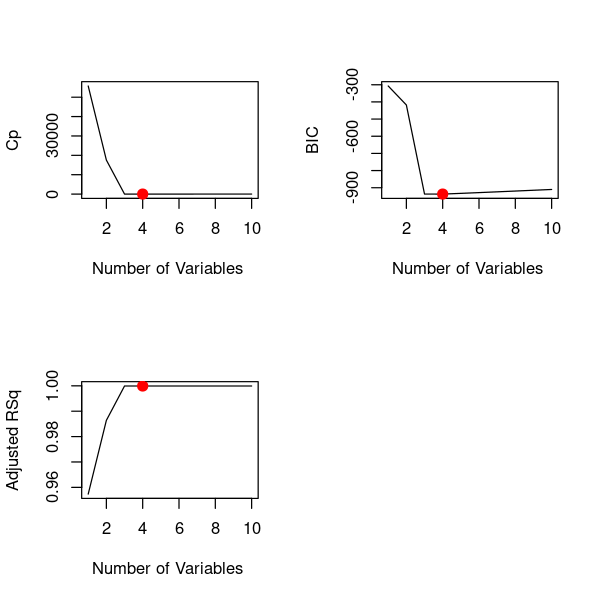

In [84]:
par(mfrow=c(2,2))


plot(reg.summary$cp ,xlab="Number of Variables ",ylab="Cp",type="l")
min_cp = which.min(reg.summary$cp )
points(min_cp, reg.summary$cp[min_cp], col="red", cex=2, pch=20)


plot(reg.summary$bic ,xlab="Number of Variables ",ylab="BIC",type="l")
min_bic = which.min(reg.summary$bic )
points(min_bic, reg.summary$bic[min_bic], col="red", cex=2, pch=20)


plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="Adjusted RSq",type="l")
max_adjr2 = which.max(reg.summary$adjr2)
points(max_adjr2, reg.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)

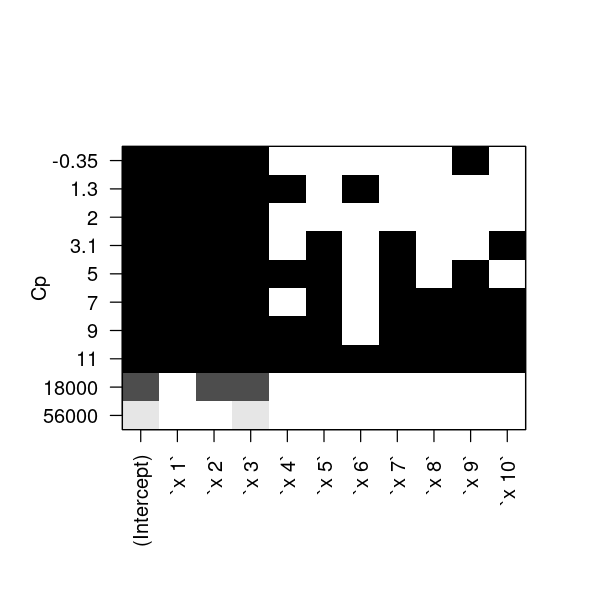

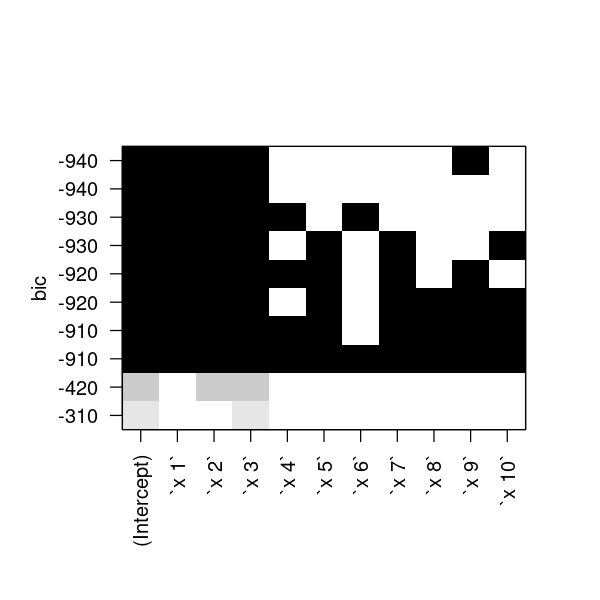

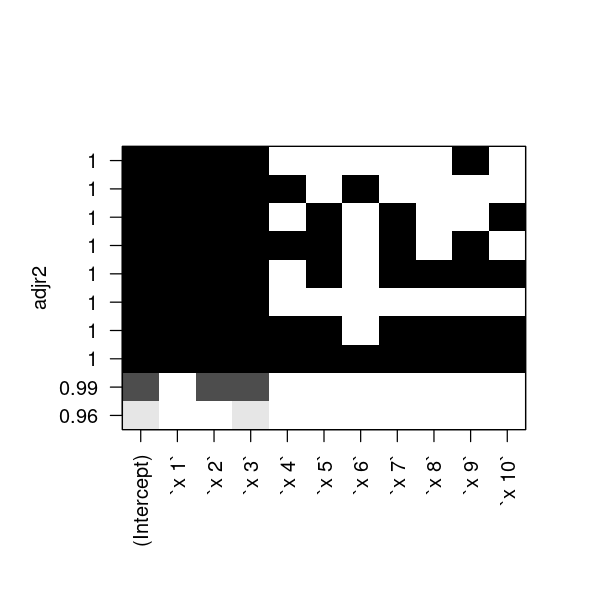

In [99]:
plot(regfit.full ,scale="Cp")
plot(regfit.full ,scale="bic")
plot(regfit.full ,scale="adjr2")

In [104]:
coef(regfit.full ,4)

(Intercept)         `x 1`         `x 2`         `x 3`         `x 9` 
 1.197382e+01  4.956609e+00  4.316184e+00 -7.973356e+00 -4.543976e-05

#### According to the above analysis, the best model obtained includes 4 predictor variables: x1, x2, x3 and x9

## (d)

### Forward Stepwise Selection

In [91]:
regfit.fwd=regsubsets (Y~.,data=df , nvmax=10, method ="forward")
reg.summary =summary (regfit.fwd)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df, nvmax = 19, method = "forward")
10 Variables  (and intercept)
       Forced in Forced out
`x 1`      FALSE      FALSE
`x 2`      FALSE      FALSE
`x 3`      FALSE      FALSE
`x 4`      FALSE      FALSE
`x 5`      FALSE      FALSE
`x 6`      FALSE      FALSE
`x 7`      FALSE      FALSE
`x 8`      FALSE      FALSE
`x 9`      FALSE      FALSE
`x 10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          `x 1` `x 2` `x 3` `x 4` `x 5` `x 6` `x 7` `x 8` `x 9` `x 10`
1  ( 1 )  " "   " "   "*"   " "   " "   " "   " "   " "   " "   " "   
2  ( 1 )  " "   "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
3  ( 1 )  "*"   "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
4  ( 1 )  "*"   "*"   "*"   " "   " "   " "   " "   " "   "*"   " "   
5  ( 1 )  "*"   "*"   "*"   "*"   " "   " "   " "   " "   "*"   " "   
6  ( 1 )  "*"   "*"   "*"   "*"   " "   " "   " "   "*"   "*"   " "   
7  ( 

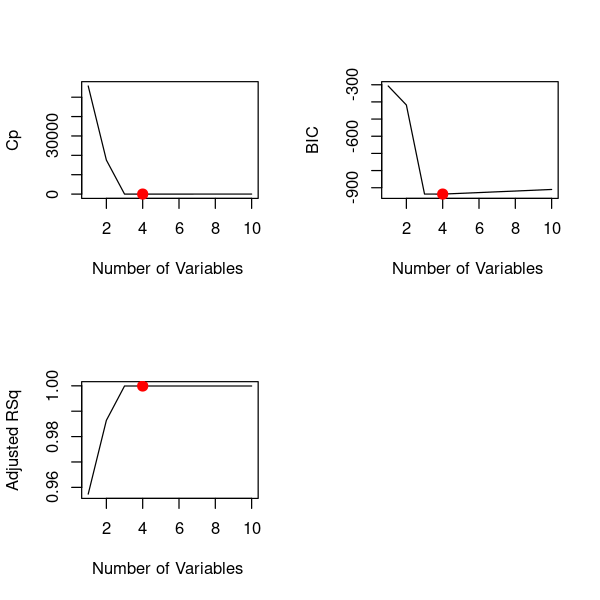

In [92]:
par(mfrow=c(2,2))


plot(reg.summary$cp ,xlab="Number of Variables ",ylab="Cp",type="l")
min_cp = which.min(reg.summary$cp )
points(min_cp, reg.summary$cp[min_cp], col="red", cex=2, pch=20)


plot(reg.summary$bic ,xlab="Number of Variables ",ylab="BIC",type="l")
min_bic = which.min(reg.summary$bic )
points(min_bic, reg.summary$bic[min_bic], col="red", cex=2, pch=20)


plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="Adjusted RSq",type="l")
max_adjr2 = which.max(reg.summary$adjr2)
points(max_adjr2, reg.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)

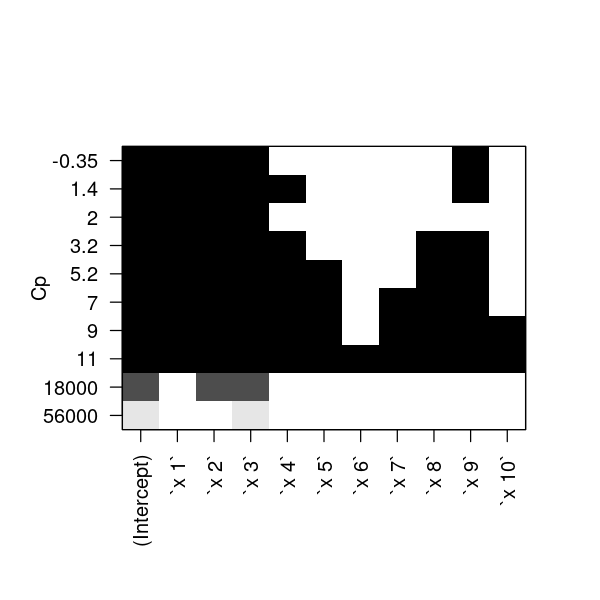

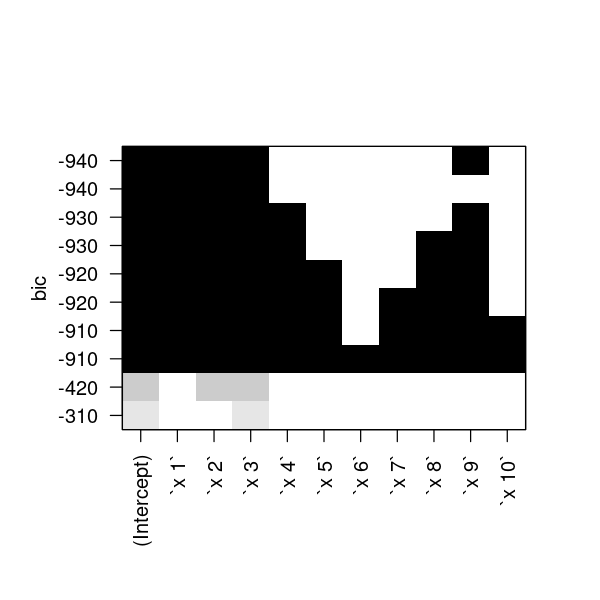

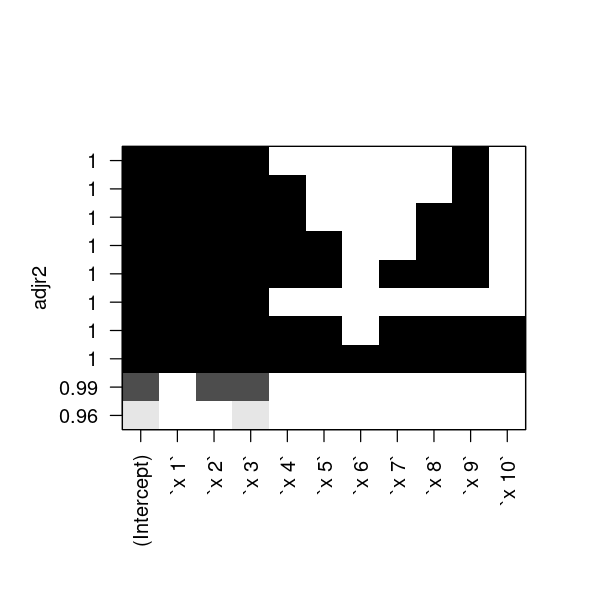

In [100]:
plot(regfit.fwd ,scale="Cp")
plot(regfit.fwd ,scale="bic")
plot(regfit.fwd ,scale="adjr2")

In [105]:
coef(regfit.fwd ,4)

(Intercept)         `x 1`         `x 2`         `x 3`         `x 9` 
 1.197382e+01  4.956609e+00  4.316184e+00 -7.973356e+00 -4.543976e-05

#### According to the above analysis, the best model obtained via forward stepwise selection includes 4 predictor variables: x1, x2, x3 and x9

### Backward Stepwise Selection

In [95]:
regfit.bwd=regsubsets (Y~.,data=df , nvmax=10, method ="backward")
reg.summary =summary (regfit.bwd)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df, nvmax = 10, method = "backward")
10 Variables  (and intercept)
       Forced in Forced out
`x 1`      FALSE      FALSE
`x 2`      FALSE      FALSE
`x 3`      FALSE      FALSE
`x 4`      FALSE      FALSE
`x 5`      FALSE      FALSE
`x 6`      FALSE      FALSE
`x 7`      FALSE      FALSE
`x 8`      FALSE      FALSE
`x 9`      FALSE      FALSE
`x 10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          `x 1` `x 2` `x 3` `x 4` `x 5` `x 6` `x 7` `x 8` `x 9` `x 10`
1  ( 1 )  " "   " "   "*"   " "   " "   " "   " "   " "   " "   " "   
2  ( 1 )  " "   "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
3  ( 1 )  "*"   "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
4  ( 1 )  "*"   "*"   "*"   " "   " "   " "   "*"   " "   " "   " "   
5  ( 1 )  "*"   "*"   "*"   " "   "*"   " "   "*"   " "   " "   " "   
6  ( 1 )  "*"   "*"   "*"   " "   "*"   " "   "*"   "*"   " "   " "   
7  

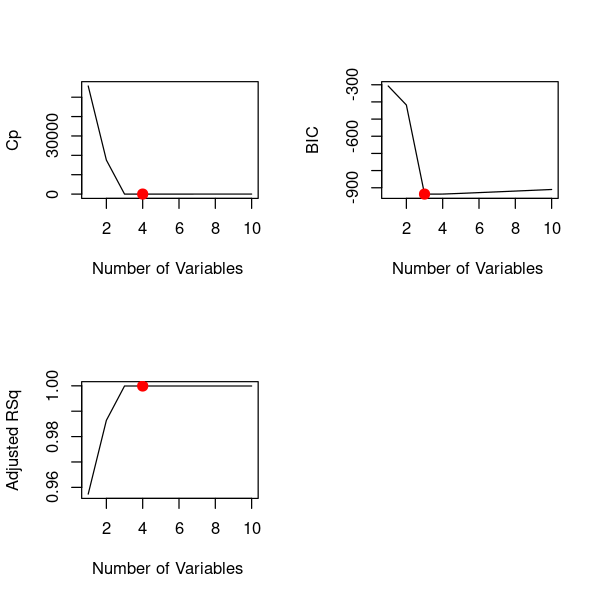

In [96]:
par(mfrow=c(2,2))


plot(reg.summary$cp ,xlab="Number of Variables ",ylab="Cp",type="l")
min_cp = which.min(reg.summary$cp )
points(min_cp, reg.summary$cp[min_cp], col="red", cex=2, pch=20)


plot(reg.summary$bic ,xlab="Number of Variables ",ylab="BIC",type="l")
min_bic = which.min(reg.summary$bic )
points(min_bic, reg.summary$bic[min_bic], col="red", cex=2, pch=20)


plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="Adjusted RSq",type="l")
max_adjr2 = which.max(reg.summary$adjr2)
points(max_adjr2, reg.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)

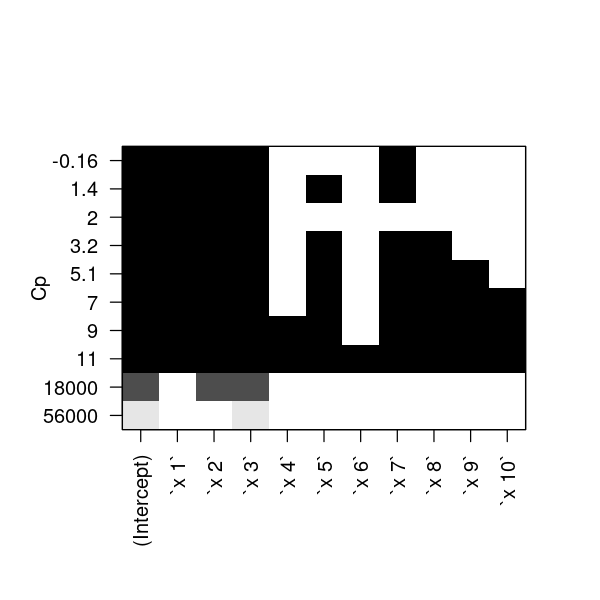

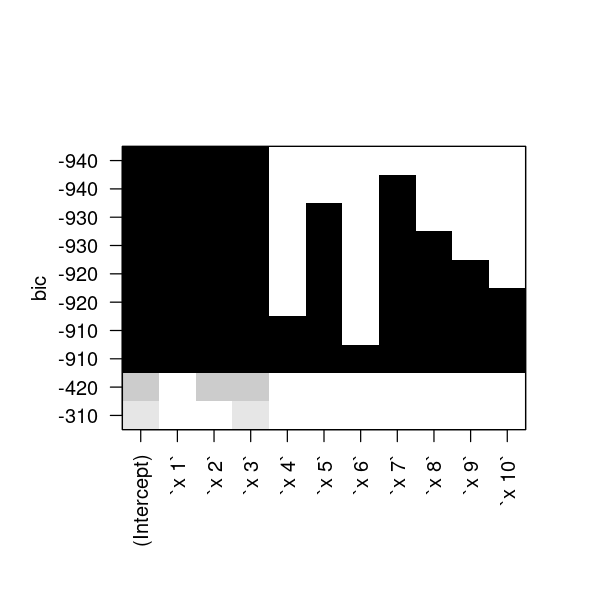

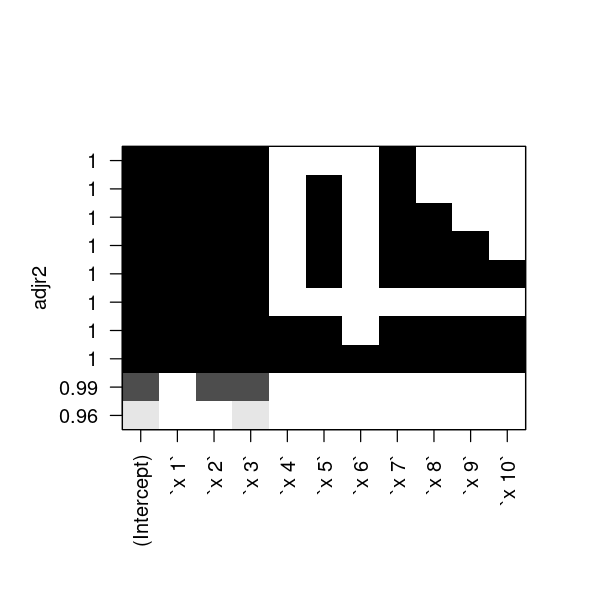

In [98]:
plot(regfit.bwd ,scale="Cp")
plot(regfit.bwd ,scale="bic")
plot(regfit.bwd ,scale="adjr2")

In [106]:
coef(regfit.bwd ,4)

(Intercept)         `x 1`         `x 2`         `x 3`         `x 7` 
11.9733990259  4.9470513574  4.3171328087 -7.9651475219 -0.0005110558

#### According to the above analysis, the best model obtained via backwards stepwise selection includes 4 predictor variables: x1, x2, x3 and x7

### (e)

In [110]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [119]:
x_mat = model.matrix(Y~.,df )[,-1]
y = Y
head(x_mat)

,`x 1`,`x 2`,`x 3`,`x 4`,`x 5`,`x 6`,`x 7`,`x 8`,`x 9`,`x 10`
1,0.17581566,0.030911146,0.0054346635,9.554989e-04,1.679917e-04,2.953557e-05,5.192815e-06,9.129782e-07,1.605159e-07,2.822120e-08
2,-0.85333388,0.728178710,-0.6213795633,5.302442e-01,-4.524754e-01,3.861126e-01,-3.294829e-01,2.811589e-01,-2.399225e-01,2.047340e-01
3,-0.07059335,0.004983422,-0.0003517965,2.483449e-05,-1.753150e-06,1.237607e-07,-8.736686e-09,6.167520e-10,-4.353859e-11,3.073535e-12
4,-2.10899960,4.447879317,-9.3805757063,1.978363e+01,-4.172367e+01,8.799520e+01,-1.855818e+02,3.913920e+02,-8.254456e+02,1.740865e+03
5,-0.51240497,0.262558854,-0.1345364616,6.893715e-02,-3.532374e-02,1.810006e-02,-9.274560e-03,4.752331e-03,-2.435118e-03,1.247767e-03
6,-1.99360400,3.974456898,-7.9234931603,1.579631e+01,-3.149158e+01,6.278174e+01,-1.251619e+02,2.495233e+02,-4.974507e+02,9.917197e+02


In [131]:
grid=10^seq(10,-2, length =100)

In [120]:
train = sample (1: nrow(x_mat), nrow(x_mat)/2)
test = (-train)
y.test = y[test]

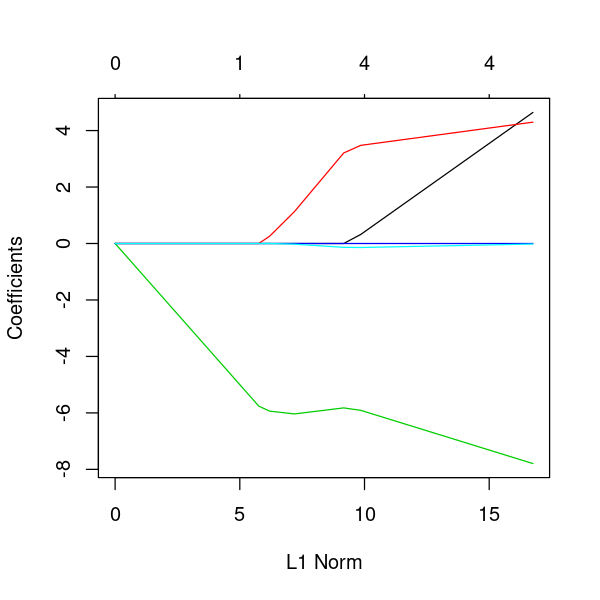

In [121]:
lasso.mod = glmnet(x_mat[train,], y[train], alpha=1, lambda = grid)
plot(lasso.mod)

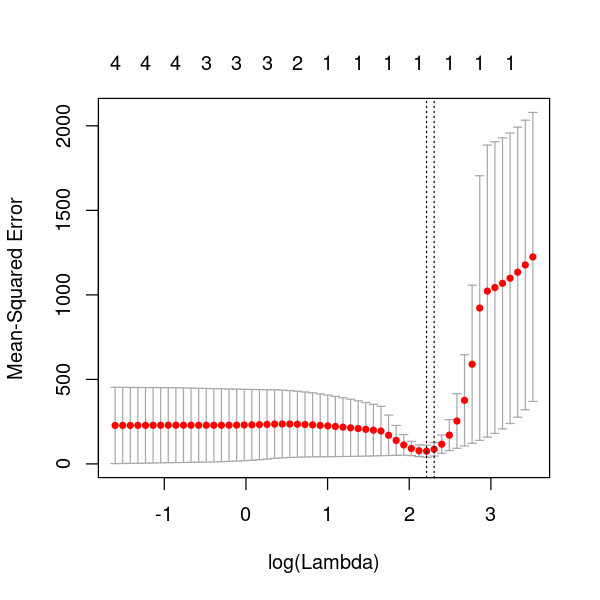

In [122]:
cv.out = cv.glmnet(x_mat[train ,],y[ train],alpha=1)
plot(cv.out)

In [124]:
bestlam = cv.out$lambda.min
lasso.pred = predict (lasso.mod ,s=bestlam ,newx=x_mat[test ,])
mean((lasso.pred -y.test)^2)

[1] 65.66677

In [128]:
out = glmnet (x_mat, y, alpha=1, lambda=grid)
lasso.coef = predict (out ,type= "coefficients",s= bestlam) [1:10,]
lasso.coef[lasso.coef!=0]

(Intercept)       `x 3` 
  15.913325   -4.192822

## Now fit a lasso model to the simulated data, again using X, X2, ...,X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

## (f)

In [132]:
b_7 = -9.3
Y = b_0  + b_7 * (x**7) + eps

### Best Subset Selection

In [133]:
regfit.full = regsubsets (Y~.,df,nvmax=10)
reg.summary = summary (regfit.full)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
       Forced in Forced out
`x 1`      FALSE      FALSE
`x 2`      FALSE      FALSE
`x 3`      FALSE      FALSE
`x 4`      FALSE      FALSE
`x 5`      FALSE      FALSE
`x 6`      FALSE      FALSE
`x 7`      FALSE      FALSE
`x 8`      FALSE      FALSE
`x 9`      FALSE      FALSE
`x 10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          `x 1` `x 2` `x 3` `x 4` `x 5` `x 6` `x 7` `x 8` `x 9` `x 10`
1  ( 1 )  " "   " "   " "   " "   " "   " "   "*"   " "   " "   " "   
2  ( 1 )  " "   " "   " "   " "   " "   " "   "*"   " "   "*"   " "   
3  ( 1 )  " "   " "   " "   " "   " "   "*"   "*"   "*"   " "   " "   
4  ( 1 )  " "   " "   "*"   " "   "*"   " "   "*"   " "   " "   "*"   
5  ( 1 )  " "   " "   "*"   " "   "*"   "*"   "*"   " "   "*"   " "   
6  ( 1 )  "*"   " "   "*"   " "   "*"   "*"   "*"   " "   "*"   " "   
7  ( 1 )  "*"   " "   "*"   "

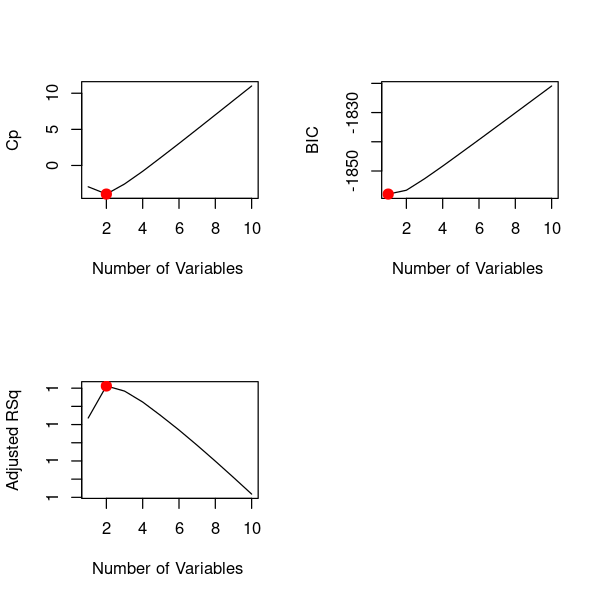

In [134]:
par(mfrow=c(2,2))


plot(reg.summary$cp ,xlab="Number of Variables ",ylab="Cp",type="l")
min_cp = which.min(reg.summary$cp )
points(min_cp, reg.summary$cp[min_cp], col="red", cex=2, pch=20)


plot(reg.summary$bic ,xlab="Number of Variables ",ylab="BIC",type="l")
min_bic = which.min(reg.summary$bic )
points(min_bic, reg.summary$bic[min_bic], col="red", cex=2, pch=20)


plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="Adjusted RSq",type="l")
max_adjr2 = which.max(reg.summary$adjr2)
points(max_adjr2, reg.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)

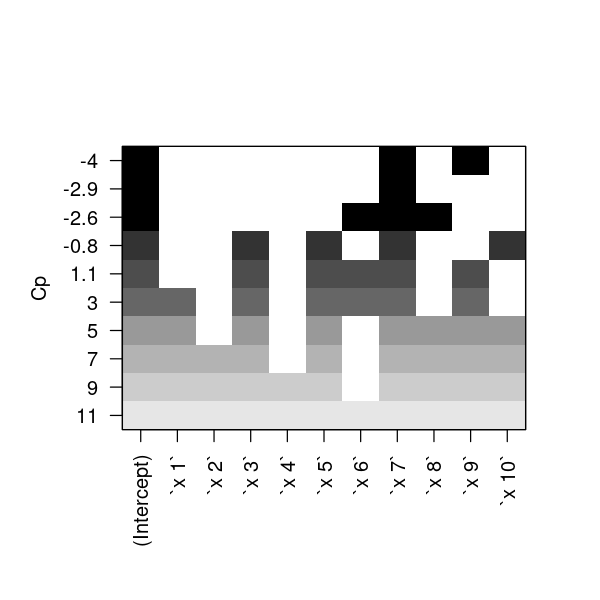

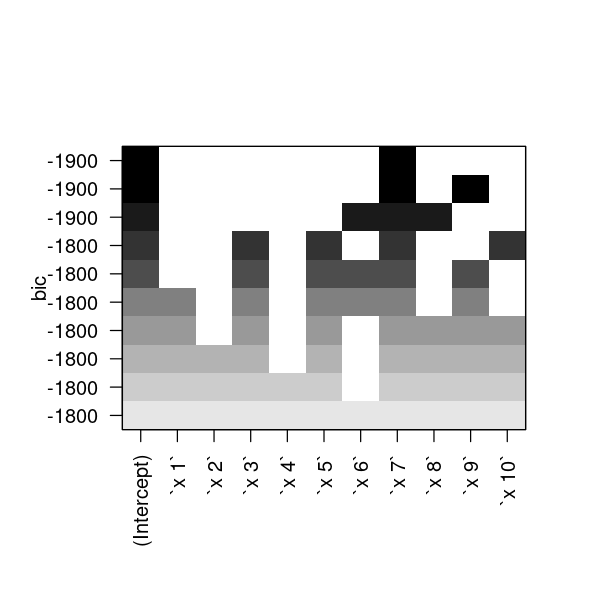

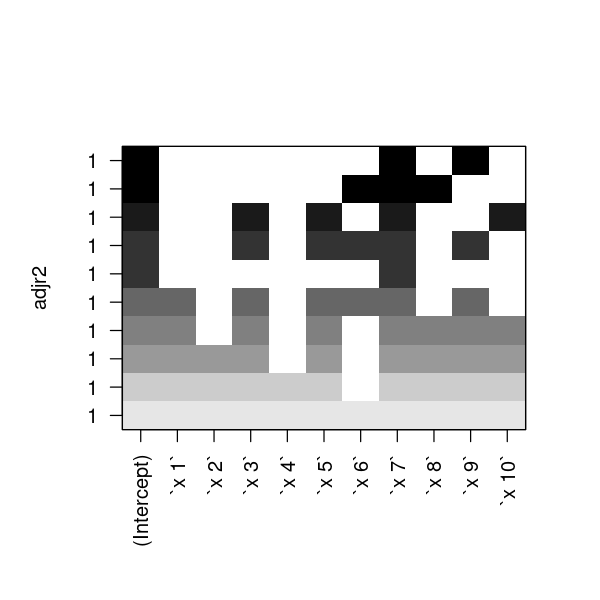

In [135]:
plot(regfit.full ,scale="Cp")
plot(regfit.full ,scale="bic")
plot(regfit.full ,scale="adjr2")

In [136]:
coef(regfit.full, 2)

(Intercept)         `x 7`         `x 9` 
11.9872515763 -9.2987326284 -0.0001475059

#### According to the above analysis, the best model obtained includes 2 predictor variables: x7 and x9

### Lasso

In [138]:
x_mat = model.matrix(Y~.,df )[,-1]
y = Y
head(x_mat)

,`x 1`,`x 2`,`x 3`,`x 4`,`x 5`,`x 6`,`x 7`,`x 8`,`x 9`,`x 10`
1,0.17581566,0.030911146,0.0054346635,9.554989e-04,1.679917e-04,2.953557e-05,5.192815e-06,9.129782e-07,1.605159e-07,2.822120e-08
2,-0.85333388,0.728178710,-0.6213795633,5.302442e-01,-4.524754e-01,3.861126e-01,-3.294829e-01,2.811589e-01,-2.399225e-01,2.047340e-01
3,-0.07059335,0.004983422,-0.0003517965,2.483449e-05,-1.753150e-06,1.237607e-07,-8.736686e-09,6.167520e-10,-4.353859e-11,3.073535e-12
4,-2.10899960,4.447879317,-9.3805757063,1.978363e+01,-4.172367e+01,8.799520e+01,-1.855818e+02,3.913920e+02,-8.254456e+02,1.740865e+03
5,-0.51240497,0.262558854,-0.1345364616,6.893715e-02,-3.532374e-02,1.810006e-02,-9.274560e-03,4.752331e-03,-2.435118e-03,1.247767e-03
6,-1.99360400,3.974456898,-7.9234931603,1.579631e+01,-3.149158e+01,6.278174e+01,-1.251619e+02,2.495233e+02,-4.974507e+02,9.917197e+02


In [139]:
grid=10^seq(10,-2, length =100)

In [140]:
train = sample (1: nrow(x_mat), nrow(x_mat)/2)
test = (-train)
y.test = y[test]

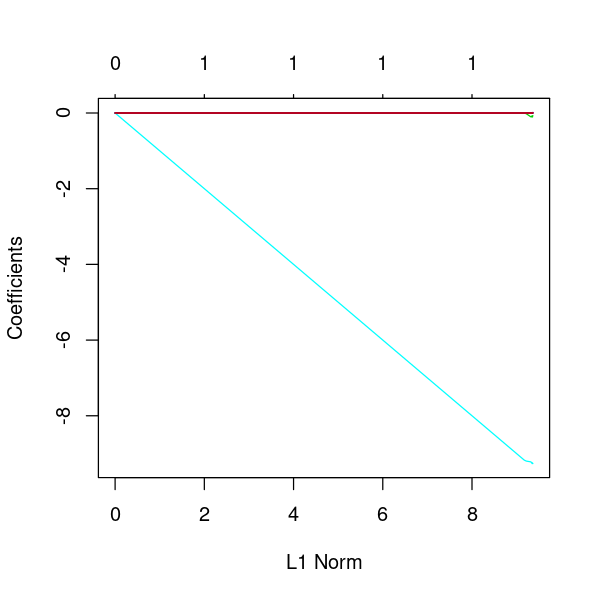

In [141]:
lasso.mod = glmnet(x_mat[train,], y[train], alpha=1, lambda = grid)
plot(lasso.mod)

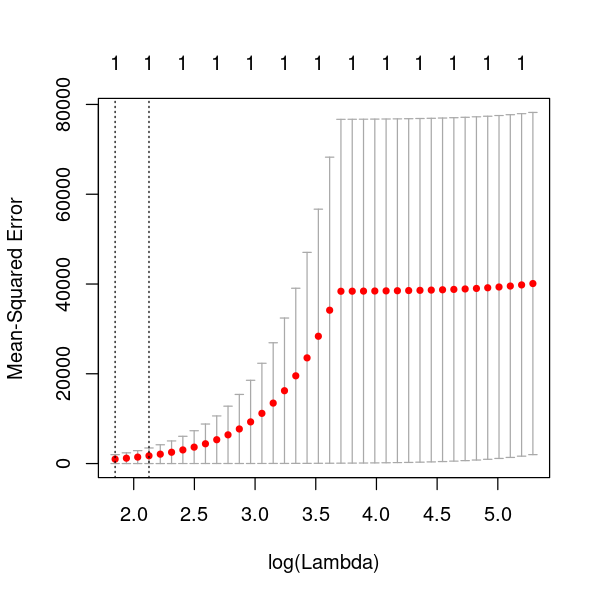

In [142]:
cv.out = cv.glmnet(x_mat[train ,],y[ train],alpha=1)
plot(cv.out)

In [143]:
bestlam = cv.out$lambda.min
lasso.pred = predict (lasso.mod ,s=bestlam ,newx=x_mat[test ,])
mean((lasso.pred -y.test)^2)

[1] 13953.37

In [144]:
out = glmnet (x_mat, y, alpha=1, lambda=grid)
lasso.coef = predict (out ,type= "coefficients",s= bestlam) [1:10,]
lasso.coef[lasso.coef!=0]

(Intercept)         `x 5`         `x 6`         `x 7`         `x 8` 
11.3043075007 -0.3351705159 -0.0039766205 -9.2250252323 -0.0013672019 
        `x 9` 
-0.0009668269

## Discuss the results obtained.